In [15]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

tk = th.Thicket.from_caliperreader(glob("*s65536*.cali"))

tk.dataframe



tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
2304124389,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-s65536-t1.cali,true,1700110740,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Selection_Sort, 1, 2, 65536]",c,Selection Sort,MPI,int,4,65536,Sorted,2,16,"Handwritten, AI, & Online"
3483346744,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-s65536-t1.cali,true,1700110740,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Selection_Sort, 1, 4, 65536]",c,Selection Sort,MPI,int,4,65536,Sorted,4,16,"Handwritten, AI, & Online"
4060682330,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-s65536-t1.cali,true,1700110740,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./Selection_Sort, 1, 8, 65536]",c,Selection Sort,MPI,int,4,65536,Sorted,8,16,"Handwritten, AI, & Online"


In [16]:
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [17]:
gb = tk.groupby("InputType")

1  thickets created...
{'Sorted': <thicket.thicket.Thicket object at 0x2ad063e82940>}


In [20]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis='columns',
    metadata_key='num_procs'
)


In [21]:
ctk.dataframe

Sorted  \
                                                               nid   
node                                              num_procs          
{'name': 'main', 'type': 'function'}              2              1   
                                                  4              1   
                                                  8              1   
{'name': 'comm', 'type': 'function'}              2              3   
                                                  4              3   
                                                  8              3   
{'name': 'comm_large', 'type': 'function'}        2              4   
                                                  4              4   
                                                  8              4   
{'name': 'comp', 'type': 'function'}              2              5   
                                                  4              5   
                                                  8              5   
{'name': 'comp_large', 'type': 'function'}        2              6   
                                                  4              6   
                                                  8              6   
{'name': 'correctness_check', 'type': 'function'} 2              7   
                                                  4              7   
                                                  8              7   
{'name': 'data_init', 'type': 'function'}         2              2   
                                                  4              2   
                                                  8              2   

                                                                            \
                                                              spot.channel   
node                                              num_procs                  
{'name': 'main', 'type': 'function'}              2          regionprofile   
                                                  4          regionprofile   
                                                  8          regionprofile   
{'name': 'comm', 'type': 'function'}              2          regionprofile   
                                                  4          regionprofile   
                                                  8          regionprofile   
{'name': 'comm_large', 'type': 'function'}        2          regionprofile   
                                                  4          regionprofile   
                                                  8          regionprofile   
{'name': 'comp', 'type': 'function'}              2          regionprofile   
                                                  4          regionprofile   
                                                  8          regionprofile   
{'name': 'comp_large', 'type': 'function'}        2          regionprofile   
                                                  4          regionprofile   
                                                  8          regionprofile   
{'name': 'correctness_check', 'type': 'function'} 2          regionprofile   
                                                  4          regionprofile   
                                                  8          regionprofile   
{'name': 'data_init', 'type': 'function'}         2          regionprofile   
                                                  4          regionprofile   
                                                  8          regionprofile   

                                                                           \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.008319   
                                                  4              0.031720   
                                                  8              0.029942   
{'name': 'comm', 'type': 'function'}        

In [22]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), 
                                                 ('Sorted', "nid"), ('Sorted', "spot.channel"),('Sorted', "Min time/rank"), ('Sorted', "Max time/rank"),('Sorted', "Total time"), ('Sorted', "Variance time/rank"),
                                                 
                                                 ], axis=1)

In [23]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
ctk.dataframe

Sorted
                            Avg time/rank
name              num_procs              
main              2              5.936171
                  4              5.956217
                  8              5.994606
comm              2              0.011388
                  4              0.010463
                  8              0.010824
comm_large        2              0.011350
                  4              0.010442
                  8              0.010806
comp              2              5.912361
                  4              5.921195
                  8              5.924588
comp_large        2              5.912328
                  4              5.921170
                  8              5.924572
correctness_check 2              0.000409
                  4              0.000109
                  8              0.001285
data_init         2              0.000719
                  4              0.006790
                  8              0.000192

In [25]:
main = ctk.dataframe.loc["main"]
main

,Sorted
,Avg time/rank
num_procs,
2,5.936171
4,5.956217
8,5.994606


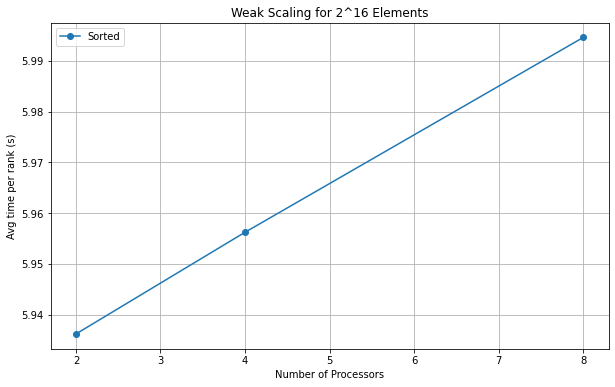

In [26]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
legend_labels = []
for column in main.columns:
    first_index = column[0]  # Extract the first index
    legend_labels.append(first_index)
    plt.plot(main.index, main.xs(column, axis=1), marker='o', label=column)

plt.xlabel('Number of Processors')
plt.ylabel('Avg time per rank (s)')
plt.title('Weak Scaling for 2^16 Elements')
plt.legend(legend_labels)
plt.grid(True)
plt.show()